In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import pandas as pd
import geopandas as gpd # dependencies: shapely, GDAL, Fiona, pyproj
import numpy as np
import seaborn as sns; sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.2)
import matplotlib.pyplot as plt

In [3]:
# 언론사 목록
df = pd.read_excel('/Users/charles/git/metaverse/data/bigkinds.xlsx', sheet_name='sheet' ,index_col='일자', parse_dates=True)
df['언론사'].unique()

array(['한국경제', '대전일보', 'KBS', '경향신문', '헤럴드경제', '머니투데이', '아시아경제', '동아일보',
       '디지털타임스', '매일경제', '중부매일', '조선일보', '전북일보', '아주경제', '파이낸셜뉴스', '부산일보',
       '전자신문', '서울경제', '서울신문', '중부일보', '충청일보', '중앙일보', '무등일보', '전북도민일보',
       '매일신문', '대구일보', '한겨레', 'YTN', '전남일보', '내일신문', '한국일보', '국민일보',
       '문화일보', '영남일보', '경남도민일보', '강원일보', '광주일보', '중도일보', '국제신문', '충청투데이',
       '경남신문', 'MBC', 'SBS', '한라일보', '세계일보', '경기일보', '광주매일신문', '충북일보',
       '강원도민일보', '경상일보', '울산매일', '경인일보', '제민일보', 'OBS'], dtype=object)

In [4]:
# 언론사별 메타버스 기사건수
df1 = df.groupby(df['언론사']).size().reset_index(name='기사건수')
df1 = df1.sort_values(by='기사건수', ascending=False)
df1.head(10)

,언론사,기사건수
24,머니투데이,1580
38,전자신문,1387
31,아시아경제,1327
50,한국경제,1298
22,매일경제,1261
28,서울경제,1098
32,아주경제,1090
53,헤럴드경제,980
21,디지털타임스,569
44,중앙일보,454


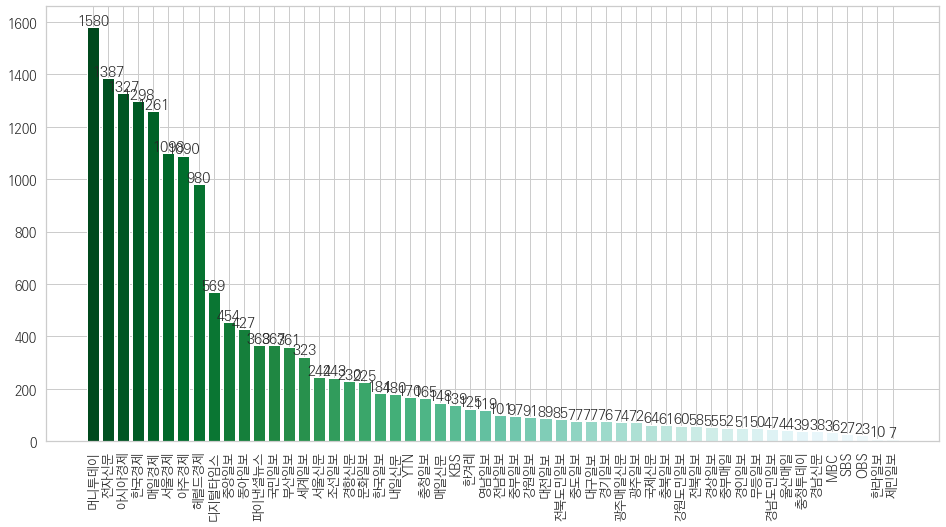

In [5]:
# 언론사별 메타버스 기사건수 바 플롯
f, ax = plt.subplots(figsize=(16, 8));  plt.xticks(rotation=90)
plot = ax.bar(df1['언론사'], df1['기사건수'], color=sns.color_palette("BuGn_r", df1['언론사'].count()))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
plt.savefig('/Users/charles/git/metaverse/data/bigkinds_press.png', bbox_inches='tight')

In [6]:
# 시도경계 Shapefile
shapefile = '/Users/charles/git/metaverse/data/gadm36_KOR_shp/gadm36_KOR_1.shp'
gdf = gpd.read_file(shapefile)[['NAME_1', 'geometry']]
gdf.columns = ['name', 'geometry']
gdf

,name,geometry
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ..."
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199..."
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ..."
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671..."
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204..."
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ..."
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094..."
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ..."
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ..."
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ..."


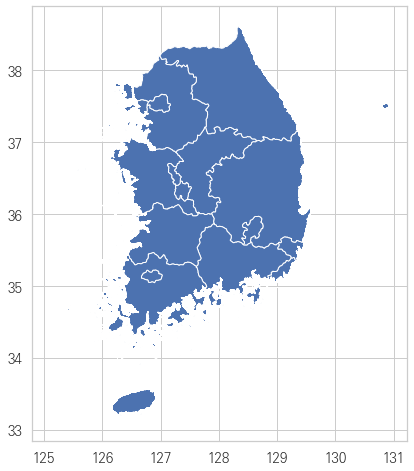

In [7]:
# 시도경계 지도화
gdf.plot(figsize=(16, 8))
plt.savefig('/Users/charles/git/metaverse/data/gdf.png', bbox_inches='tight')

In [8]:
# 언론사별 시도
conditions = [
    (df1['언론사'] == '경기일보') | (df1['언론사'] == '경인일보') | (df1['언론사'] == 'OBS'),
    (df1['언론사'] == '강원도민일보') | (df1['언론사'] == '강원일보'),
    (df1['언론사'] == '대전일보') | (df1['언론사'] == '중도일보') | (df1['언론사'] == '충청투데이'),
    (df1['언론사'] == '중부매일') | (df1['언론사'] == '충북일보') | (df1['언론사'] == '충청일보'),
    (df1['언론사'] == '경남도민일보') | (df1['언론사'] == '경남신문'),
    (df1['언론사'] == '경상일보') | (df1['언론사'] == '울산매일'),
    (df1['언론사'] == '국제신문') | (df1['언론사'] == '부산일보'),
    (df1['언론사'] == '대구일보') | (df1['언론사'] == '매일신문') | (df1['언론사'] == '영남일보'),
    (df1['언론사'] == '광주매일신문') | (df1['언론사'] == '광주일보') | (df1['언론사'] == '무등일보'),
    (df1['언론사'] == '전남일보'),
    (df1['언론사'] == '전북도민일보') | (df1['언론사'] == '전북일보'),
    (df1['언론사'] == '제민일보') | (df1['언론사'] == '한라일보')]
choices = ['Gyeonggi-do', 'Gangwon-do', 'Daejeon', 'Chungcheongbuk-do', 'Gyeongsangnam-do',
           'Ulsan', 'Busan', 'Daegu', 'Gwangju', 'Jeollanam-do', 'Jeollabuk-do', 'Jeju']
df1['name'] = np.select(conditions, choices, default='Seoul')
df1.head(10)

,언론사,기사건수,name
24,머니투데이,1580,Seoul
38,전자신문,1387,Seoul
31,아시아경제,1327,Seoul
50,한국경제,1298,Seoul
22,매일경제,1261,Seoul
28,서울경제,1098,Seoul
32,아주경제,1090,Seoul
53,헤럴드경제,980,Seoul
21,디지털타임스,569,Seoul
44,중앙일보,454,Seoul


In [9]:
# 시도별 기사건수
df2 = pd.DataFrame(df1["기사건수"].groupby(df1["name"]).sum())
df2.sort_values(by='기사건수', ascending=False)

,기사건수
name,
Seoul,14429
Busan,425
Daegu,344
Chungcheongbuk-do,278
Daejeon,205
Gwangju,196
Gangwon-do,151
Gyeonggi-do,150
Jeollabuk-do,143


In [10]:
# GeoPandas 병합
gdf = gdf.merge(df2, on='name', how='outer').fillna(0)
gdf

,name,geometry,기사건수
0,Busan,"MULTIPOLYGON (((128.99403 34.98180, 128.99403 ...",425.0
1,Chungcheongbuk-do,"POLYGON ((128.01720 36.20695, 128.01471 36.199...",278.0
2,Chungcheongnam-do,"MULTIPOLYGON (((126.61459 36.06736, 126.61459 ...",0.0
3,Daegu,"POLYGON ((128.68794 35.68165, 128.67543 35.671...",344.0
4,Daejeon,"POLYGON ((127.38995 36.20081, 127.38162 36.204...",205.0
5,Gangwon-do,"MULTIPOLYGON (((129.32625 37.28597, 129.32625 ...",151.0
6,Gwangju,"POLYGON ((127.01669 35.10629, 127.01091 35.094...",196.0
7,Gyeonggi-do,"MULTIPOLYGON (((126.72736 37.01403, 126.72736 ...",150.0
8,Gyeongsangbuk-do,"MULTIPOLYGON (((129.42291 36.01875, 129.42291 ...",0.0
9,Gyeongsangnam-do,"MULTIPOLYGON (((128.73097 34.53931, 128.73097 ...",85.0


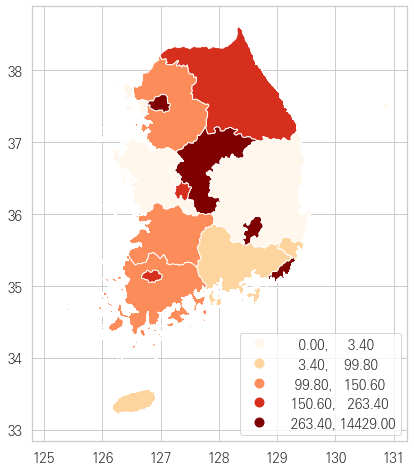

In [11]:
# 시도별 기사건수 지도화
f, ax = plt.subplots(1, 1, figsize=(16, 8))
gdf.plot(column='기사건수', ax=ax,
         legend=True, legend_kwds={'loc': 'lower right'},
         cmap='OrRd', scheme='quantiles')
plt.savefig('/Users/charles/git/metaverse/data/bigkinds_press02.png', bbox_inches='tight')